# Estadística elemental

> La estadística es la ciencia que se encarga de obtener, describir e interpretar los datos” 
(Johnson & Kuby, 2008).

La estadística puede dividirse en dos grandes campos de acción: **estadística descriptiva** y **estadística inferencial**. 
- La estadística descriptiva incluye la obtención, presentación y descripción de los datos muestrales. 
- El término estadística inferencial se refiere a la técnica de interpretación de los valores - resultantes de las técnicas descriptivas y la toma de decisiones, así como a la obtención de conclusiones relativas a la población (ibid).

### Definiciones básicas
- La **población** es “la colección completa, o conjunto total de individuos, objetos o eventos cuyas propiedades serán analizadas”.
    - La población puede ser finita o infinita (según si los elementos de la misma se pueden enumerar - fácilmente o no). 
    - A menudo, aún con poblaciones finitas, el número de elementos es muy grande, por lo que se suele trabajar con una muestra.
- Una **muestra** es un subconjunto de la población, y está constituida por individuos, objetos o elementos seleccionados de la población.
- Cuando trabajamos con la población, los valores numéricos que resumen los datos se llaman **parámetros**. 
- Si estamos trabajando con una muestra, esos mismos valores numéricos se conocen como **estadísticos**.
- Una **variable** “es una característica de interés relacionada con cada elemento individual de una población o muestra”. Parámetros y estadísticos resumen los valores de las variables.
    - Es importante tener en cuenta que los parámetros tienen un valor fijo, pero no así los estadísticos. 
    - Un estadístico puede variar, y de hecho lo hace, cada vez que se selecciona una muestra distinta de la - población. Esto, que ahora mencionamos de pasada, es una de las columnas vertebrales de lo que vendrá después.
- Un **dato** “es el valor de la variable asociada a un elemento de la población o muestra. Este valor puede ser un número, una palabra o un símbolo”.
- Los **datos** “son el conjunto de valores que se obtienen de la variable a partir de cada uno de los elementos que pertenecen a la muestra”.
- Finalmente, en estadística, un **experimento** se define como “una actividad planificada cuyos resultados producen un conjunto de datos”.

#### Ejercicio:
Si queremos determinar la nota media obtenida en los exámenes de matemáticas por los estudiantes de una universidad, en el año académico 2024-2025:
Define: 
- La población:
- Una muestra:
- La variable:
- Un dato:
- Los datos:
- El experimento:
- El parámetro:
- El estadístico:

**Solución**
- La población será la colección de todas las notas obtenidas en todos los exámenes de matemáticas de todos los alumnos de segundo de bachillerato del instituto Luís Vives, durante el año académico 2024-2025.
- Una muestra será cualquier subconjunto de la población. Por ejemplo, las notas de los exámenes de matemáticas realizados por los alumnos del grupo B de segundo de bachillerato, o las notas de un grupo de alumnos seleccionados de cada grupo.
- La variable es la nota de cada uno de los exámenes.
- Un dato es la nota obtenida por uno de los estudiantes de segundo de bachillerato, en uno de los exámenes de matemáticas del año académico en cuestión.
- Los datos serían el conjunto de notas obtenidas en los exámenes de matemáticas correspondientes a la muestra.
- El experimento es el método aplicado para seleccionar las notas que conforman la muestra. Por ejemplo, preguntando al azar a varios alumnos de segundo de bachillerato qué notas han sacado en sus exámenes de matemáticas.
- El parámetro sobre el que se está buscando información es el valor promedio de todas las notas de la población.
- El estadístico que encontrará el experimento es el valor promedio de todas las notas de la muestra.

## Experimento

Vamos a hacer un pequeño experimento, consistente en:

- Generar con Python una serie de notas de matemáticas de alumnos, que será nuestra población, y calcularemos la media de la población. Este será nuestro parámetro.
- De esa población, vamos a seleccionar de forma aleatoria un subconjunto de datos (una muestra), y vamos a calcular la nota media de esa muestra. Este será nuestro estadístico.
- Repetiremos el paso 2 varias veces, seleccionando aleatoriamente datos de la población, y volveremos a calcular la media.

### Generación de datos


In [10]:
import pandas as pd
import numpy as np
import random
import string
 
# Establecer semillas para la reproducibilidad
np.random.seed(42)
random.seed(42)
 
# Función para generar id_estudiante alfanuméricos aleatorios
def generar_id_estudiante(n):
    ids = []
    for _ in range(n):
        id_estudiante = ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
        ids.append(id_estudiante)
    return ids
 
# Generar datos
num_estudiantes_por_grupo = 40
total_estudiantes = num_estudiantes_por_grupo * 4
num_notas = 10
 
ids = generar_id_estudiante(total_estudiantes)
asignatura = 'Matemáticas'
temas = [f'Tema {i+1}' for i in range(num_notas)]
fecha_inicio = pd.Timestamp('2024-09-01')
 
# Función para generar tiempo de estudio con correlación positiva con notas
def generar_tiempo_estudio(notas, media=270, sd=60, correlacion=0.75):
    ruido = np.random.normal(0, sd, len(notas))
    tiempo_estudio = media + correlacion * (notas - np.mean(notas)) + ruido
    return tiempo_estudio.clip(60, 480).astype(int)
 
# Generar las notas, fechas y otras columnas
data = {
    'id_estudiante': [],
    'asignatura': [],
    'tema': [],
    'fecha': [],
    'nota': [],
    'calificacion': [],
    'estatura': [],
    'sexo': [],
    'tiempo_estudio': [],
    'grupo': []
}
 
# Grupos disponibles
grupos = ['A', 'B', 'C', 'D']
num_grupos = len(grupos)
 
# Asignar aleatoriamente los estudiantes a los grupos
grupo_asignado = np.repeat(grupos, num_estudiantes_por_grupo)
random.shuffle(grupo_asignado)
 
for idx, id_estudiante in enumerate(ids):
    fechas = [fecha_inicio + pd.DateOffset(weeks=i*4) for i in range(num_notas)]
    notas = np.random.normal(6.5, 1, num_notas).clip(0, 10)
    estatura = np.random.uniform(150, 190, num_notas)
    sexo = random.choice(['H', 'M'])
 
    tiempo_estudio = generar_tiempo_estudio(notas)
 
    for i in range(num_notas):
        data['id_estudiante'].append(id_estudiante)
        data['asignatura'].append(asignatura)
        data['tema'].append(temas[i])
        data['fecha'].append(fechas[i])
        data['nota'].append(round(notas[i], 2))
 
        # Asignar calificación basada en la nota
        if 9 <= notas[i] <= 10:
            calificacion = 'sobresaliente'
        elif 7 <= notas[i] < 9:
            calificacion = 'notable'
        elif 5 <= notas[i] < 7:
            calificacion = 'aprobado'
        else:
            calificacion = 'suspenso'
 
        data['calificacion'].append(calificacion)
        data['estatura'].append(estatura[i])
        data['sexo'].append(sexo)
        data['tiempo_estudio'].append(tiempo_estudio[i])
        data['grupo'].append(grupo_asignado[idx])
 
# Crear el DataFrame
df = pd.DataFrame(data)
 
# Mostrar el DataFrame
print(df)

     id_estudiante   asignatura     tema      fecha  nota calificacion  \
0         XAJI0Y6D  Matemáticas   Tema 1 2024-09-01  7.00     aprobado   
1         XAJI0Y6D  Matemáticas   Tema 2 2024-09-29  6.36     aprobado   
2         XAJI0Y6D  Matemáticas   Tema 3 2024-10-27  7.15      notable   
3         XAJI0Y6D  Matemáticas   Tema 4 2024-11-24  8.02      notable   
4         XAJI0Y6D  Matemáticas   Tema 5 2024-12-22  6.27     aprobado   
...            ...          ...      ...        ...   ...          ...   
1595      FNKOMV2X  Matemáticas   Tema 6 2025-01-19  4.28     suspenso   
1596      FNKOMV2X  Matemáticas   Tema 7 2025-02-16  7.87      notable   
1597      FNKOMV2X  Matemáticas   Tema 8 2025-03-16  5.41     aprobado   
1598      FNKOMV2X  Matemáticas   Tema 9 2025-04-13  7.76      notable   
1599      FNKOMV2X  Matemáticas  Tema 10 2025-05-11  7.45      notable   

        estatura sexo  tiempo_estudio grupo  
0     157.272999    H             357     C  
1     157.336180   

### Reto
- A final de año académico 2024-2025, el responsable de orientación escolar ha pedido que se calcule la nota media de los exámenes de matemáticas.
- No se tiene acceso a la tabla anterior, por lo que tienen que averiguar, de alguna forma, las notas en cuestión. Pero estamos hablando de 1.600 notas. Aunque pudieran entrevistar a todos los alumnos (160), y preguntarles por sus notas en cada uno de los exámenes, no se llegaría a tiempo para entregar el trabajo (les han dado una semana de plazo). Por lo tanto, se decide trabajar con una muestra aleatoria.
- Por tanto, se va a trabajar con 40 notas (10 notas por grupo), y para recolectarlas van a hacer lo siguiente:
    1. En cada grupo, le perdirán a un alumno que saque 10 papeletas de una cesta que contiene 40 papeletas con los nombres de cada estudiante del grupo correspondiente. No hace falta devolver la papeleta a la cesta entre extracción y extracción, con lo que se aseguran de que están eligiendo a 10 alumnos distintos por grupo. Es lo que se conoce como muestreo aleatorio simple sin reemplazo.
    2. En otra cesta, meterán 10 papeletas con los temas de los exámenes (tema 1, tema 2, tema 3…), y le pedirán a cada uno de los alumnos seleccionados en el paso 1 que saque una papeleta, diga el tema que le ha tocado, y la nota que obtuvo en ese examen, y que luego devuelva la papeleta a la cesta. Es decir, es posible que dentro de un grupo se repita un tema. Esto se llama muestreo aleatorio simple con reemplazo.
    3. Los pasos 1 y 2 se repiten en cada uno de los 4 grupos.

**Nota:** Se dan tantos detalles porque la forma de recolectar las notas es muy importante. La selección debe ser lo más aleatoria posible para evitar sesgos.

### Simulación de experimento

In [11]:
def calculo_experimental_nota_media():
    # Lista de grupos
    grupos = df['grupo'].unique()

    # Seleccionar al azar 10 alumnos de cada grupo (sin reemplazo)
    alumnos_muestra = []
    for grupo in grupos:
        alumnos_grupo = df[df['grupo'] == grupo]['id_estudiante'].unique()
        muestra_grupo = random.sample(list(alumnos_grupo), 10)
        alumnos_muestra.extend(muestra_grupo)

    # Seleccionar al azar un tema para cada alumno de la muestra (con reemplazo)
    temas_muestra = {}
    for alumno in alumnos_muestra:
        notas_alumno = df[df['id_estudiante'] == alumno]
        tema_elegido = random.choice(notas_alumno['tema'].unique())
        temas_muestra[alumno] = tema_elegido

    # Crear el DataFrame de muestra con los temas seleccionados
    dfs_alumnos_temas = []
    for alumno, tema in temas_muestra.items():
        df_alumno_tema = df[(df['id_estudiante'] == alumno) & (df['tema'] == tema)]
        dfs_alumnos_temas.append(df_alumno_tema)

    df_muestra = pd.concat(dfs_alumnos_temas, ignore_index=True)

    # Calcular la nota media de la muestra
    nota_media_muestra_1 = df_muestra['nota'].mean()

    # Mostrar el DataFrame de muestra y la nota media
    print("DataFrame de muestra:")
    print(df_muestra.head())
    print()
    print(f"Nota media de la muestra: {nota_media_muestra_1:.2f}")

    return df_muestra

#### Repetir el experimento 5 veces y apuntar  la nota media. Compararla con la nota media real

In [12]:
# Nota media real
media_nota = round(df['nota'].mean(), 2)
print(f"La media de la columna 'nota' es: {media_nota}")

La media de la columna 'nota' es: 6.48


In [13]:
df_muestras = {}
for i in range(5):
    print('\n**** Experimento {0}'.format(i+1))
    df_muestras[i] = calculo_experimental_nota_media()


# print('\n >>>> df_muestras:\n', df_muestras)


**** Experimento 1
DataFrame de muestra:
  id_estudiante   asignatura    tema      fecha  nota calificacion  \
0      PKYRYBOV  Matemáticas  Tema 9 2025-04-13  7.36      notable   
1      GNZS43C5  Matemáticas  Tema 5 2024-12-22  7.36      notable   
2      1V2ISQP4  Matemáticas  Tema 2 2024-09-29  6.75     aprobado   
3      JUY0BVR6  Matemáticas  Tema 5 2024-12-22  7.45      notable   
4      MZSGIPPS  Matemáticas  Tema 4 2024-11-24  5.97     aprobado   

     estatura sexo  tiempo_estudio grupo  
0  186.512032    M             226     C  
1  180.612652    M             266     C  
2  177.783817    M             316     C  
3  158.972742    M             208     C  
4  152.611070    H             246     C  

Nota media de la muestra: 6.37

**** Experimento 2
DataFrame de muestra:
  id_estudiante   asignatura    tema      fecha  nota calificacion  \
0      PNSM43D8  Matemáticas  Tema 3 2024-10-27  7.59      notable   
1      JUY0BVR6  Matemáticas  Tema 8 2025-03-16  6.23     aprobad

### Distribución de datos
mostraremos la distribución de las notas, tanto de la población, como de una de las muestras, y luego compararemos esas distribuciones.

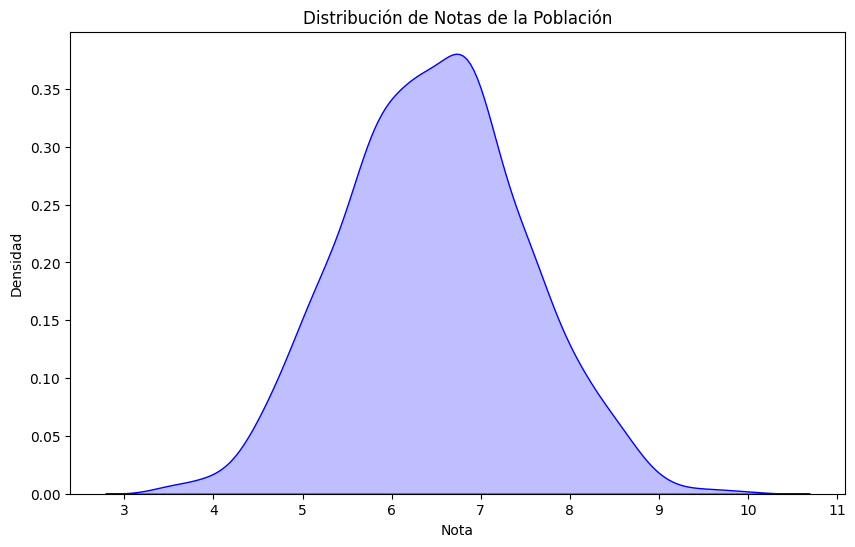

In [14]:
# Población
import seaborn as sns
import matplotlib.pyplot as plt
 
# Graficar la densidad de las notas usando Seaborn (población=
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['nota'], fill=True, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.show()

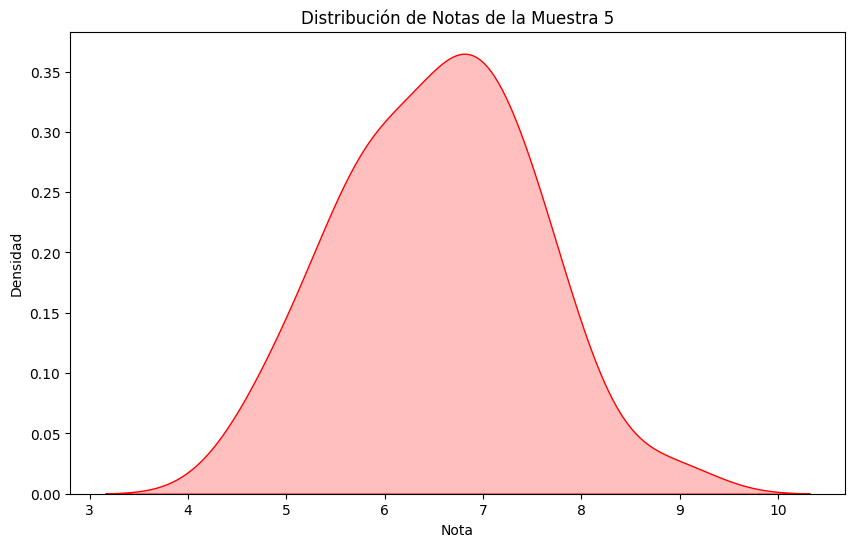

In [15]:
# Muestra 5
# Graficar la densidad de las notas usando Seaborn (muestra 5)
plt.figure(figsize=(10, 6))
df_muestra_5 = df_muestras[4]
sns.kdeplot(data=df_muestra_5['nota'], fill=True, color='red')
plt.title('Distribución de Notas de la Muestra 5')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.show()

Las notas de la muestra 5 tienen una media distinta, como es de esperar, pero también una distribución ligeramente diferente.

¡Vamos a obervar cómo se distribuyen las notas de las distintas muestras, junto con la original!

¿Qué conclusiones sugiere el gráfico?

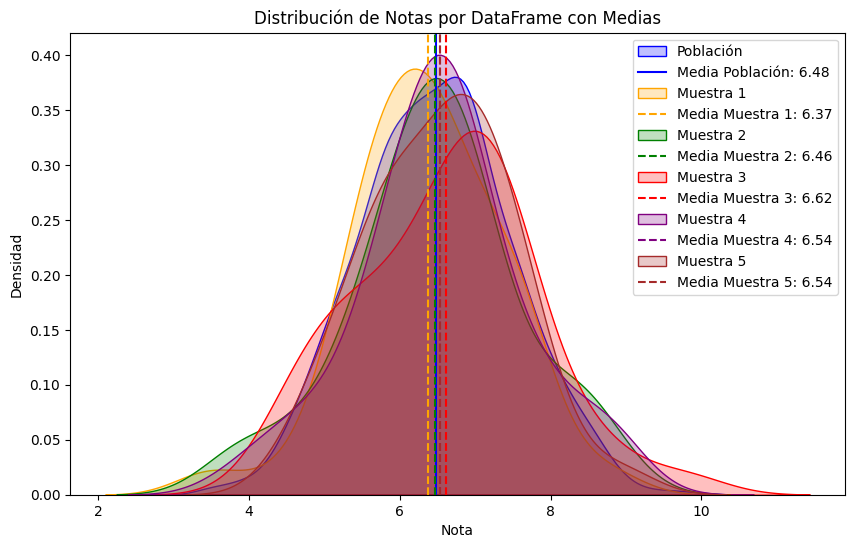

In [16]:
# Lista de DataFrames y etiquetas
dataframes = [df, df_muestras[0], df_muestras[1], df_muestras[2], df_muestras[3], df_muestras[4]]
labels = ['Población', 'Muestra 1', 'Muestra 2', 'Muestra 3', 'Muestra 4', 'Muestra 5']
 
# Colores específicos para cada muestra
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
 
# Configuración del gráfico
plt.figure(figsize=(10, 6))
 
# Graficar densidad de notas para cada DataFrame
for i, df_temp in enumerate(dataframes):
    # Determinar color y estilo de la línea vertical
    color = colors[i]
    linestyle = '-' if i == 0 else '--'
 
    # Graficar densidad de notas
    sns.kdeplot(data=df_temp['nota'], label=labels[i], fill=True, color=color)
 
    # Calcular y graficar la media como línea vertical punteada
    mean_nota = df_temp['nota'].mean()
    plt.axvline(x=mean_nota, linestyle=linestyle, color=color, label=f'Media {labels[i]}: {mean_nota:.2f}')
 
plt.title('Distribución de Notas por DataFrame con Medias')
plt.xlabel('Nota')
plt.ylabel('Densidad')
plt.legend()
plt.show()

La línea azul continua representa la media de la población. Las líneas discontinuas son las medias de las muestras.

Un estadístico puede variar, y de hecho lo hace, cada vez que se selecciona una muestra distinta de la población, pero el parámetro de la población permanece fijo.

## Tipos de variables
A continuación vamos tratar otro tema muy importante, al que se le suele prestar poca atención, pero que es **esencial** para pisar en terreno firme: los tipos de variables estadísticas.

- En el campo que nos ocupa hay **dos tipos** fundamentales de variables: las que aportan **información cualitativa**, y las que aportan **información cuantitativa**.
    - Según, Johnson y Kuby, una variable **cualitativa, de atributos o categórica**, «es una variable que **clasifica o describe** a un elemento de una población«.
    - Una variable **cuantitativa o numérica** es aquella que **«cuantifica un elemento de una población«**.

- Es un error común definir a las variables numéricas diciendo que son aquellas cuyo valor es un número. Las variables numéricas son aquellas que **tiene sentido sumar y promediar**.
- Los códigos postales o los IDs, por ejemplo, suelen ser números, pero no son variables numéricas. Los años también son números, pero tampoco son variables numéricas. No tiene sentido promediar códigos postales, o IDs. Tampoco se suele coger una lista de años, para sacar el promedio de esa lista.
    - ¿Alguna vez a visto algún estudio en el que se diga que el año promedio en que pasaron las cosas fue en 2022.5, que es lo que sale de promediar los años 2021, 2022, 2023 y 2024?
    - ¿O algún análisis en los que la suma de los años como tales tenga relevancia? De cara sacar información de un conjunto de datos, ¿nos sirve de algo saber que 2021, 2022, 2023 y 2024 suman 8.090?

### **Variables cualitativas**
Dentro de las variables cualitativas o categóricas, nos encontramos con variables:

- **Nominales**: Una variable nominal «es una variable cualitativa que caracteriza (describe o identifica) a un elemento de una población. Para los datos resultantes de una variable nominal, las operaciones aritméticas no sólo carecen de sentido, sino que tampoco se puede asignar un orden a las categorías«.
    - Como ejemplos de variables nonimales podemos poner el color de ojos, o de pelo. La cuidad de residencia, el sexo, el género de una película, el estado civil, la condición de fumador o no fumador, o de estado de salud (enfermo o sano).
    - Una variable nominal, además, puede o no ser dictómica: que sólo adoptan dos valores posibles (sí o no, 0 ó 1). En los ejemplos anteriores, el sexo (hombre o mujer), se suele tratar como dicotómica (aunque es posible encontrar cojuntos de datos en los que hay más de dos valores (hombre, mujer, no-binario). En ese caso la variable no es dicotómica.
    - El estado civil podría serlo, si en el conjunto de datos analizado sólo adopta los valores de casado o soltero.
    - Finalmente, si el estado de salud adopta los valores de enfermo o sano, también sería dicotómica.

- **Ordinales**: «es una variable cualitativa que presenta una posición, o clasificación, ordenada«.
    - Un ejemplo de variable ordinal puede ser la valoración que se le da a una película, en una escala de 1 a 5 (aunque según que casos es posible tratar dicha valoración como una variable numérica).
    - Otro ejemplo, quizá más claro, es la clasificación con letras de un determinado elemento. Por ejemplo, una habitación clasificada con las letras A, B y C según la calidad de la habitación (o con las palabras «lujo», normal, «barata»). En orden de calidad creciente, «barata» va antes que «normal», y «normal» antes que «lujo».

#### Representación gráfica
- En general, cuando queremos representar variables cualitativas se utilizan gráficos de barras. 
- En uno de los ejes se muestran los valores que toma la variable, y en el otro la frecuencia con la que aparece dicho valor en el conjunto de datos. 
- Las barras adoptan una altura proporcional a dicha frecuencia (si se quiere saber más sobre frecuencias de datos, recomendamos leer el segundo artículo de esta serie).

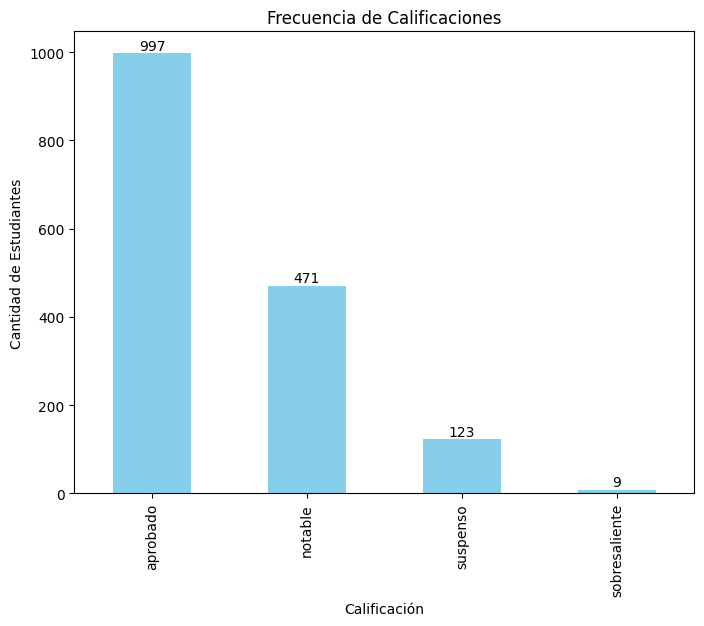

In [17]:
import matplotlib.pyplot as plt
 
# Contar las ocurrencias de cada calificación
conteo_calificaciones = df['calificacion'].value_counts()
 
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = conteo_calificaciones.plot(kind='bar', color='skyblue')
 
# Añadir título y etiquetas
plt.title('Frecuencia de Calificaciones', fontsize=12)
plt.xlabel('Calificación', fontsize=10)
plt.ylabel('Cantidad de Estudiantes', fontsize=10)
 
# Añadir los valores de conteo dentro de cada barra
for i in barras.containers:
    barras.bar_label(i, labels=[f'{v}' for v in conteo_calificaciones], label_type='edge', fontsize=10)
 
# Mostrar gráfico
plt.show()

Una forma alternativa es presentar la frecuencia relativa (es decir, el porcentaje de veces que la variable adquiere determinado valor):

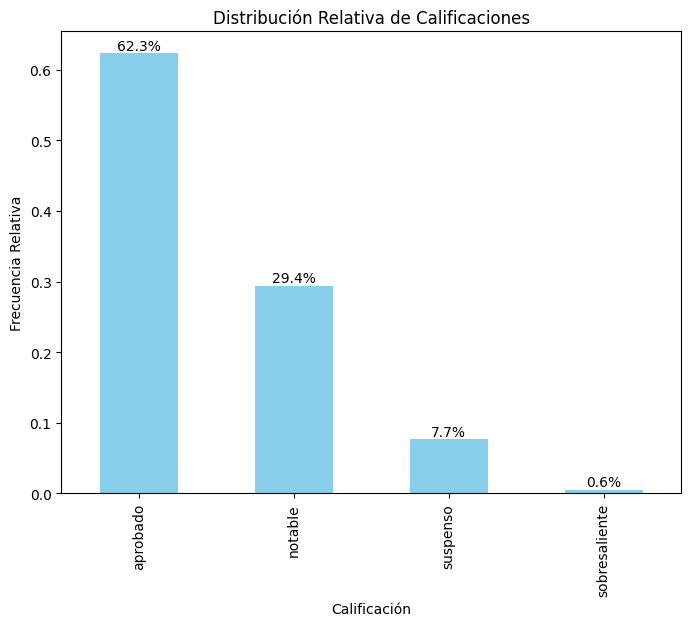

In [18]:
import matplotlib.pyplot as plt
 
# Calcular la frecuencia relativa de cada calificación
frecuencia_relativa = df['calificacion'].value_counts(normalize=True)
 
# Crear el gráfico de barras con frecuencia relativa
plt.figure(figsize=(8, 6))
barras = frecuencia_relativa.plot(kind='bar', color='skyblue')
 
# Añadir título y etiquetas
plt.title('Distribución Relativa de Calificaciones', fontsize=12)
plt.xlabel('Calificación', fontsize=10)
plt.ylabel('Frecuencia Relativa', fontsize=10)
 
# Añadir los valores de frecuencia relativa dentro de cada barra
for i in barras.containers:
    barras.bar_label(i, labels=[f'{v:.1%}' for v in frecuencia_relativa], label_type='edge', fontsize=10)
 
# Mostrar gráfico
plt.show()

Es frecuente utilizar gráficos de sectores (o de tartas) para mostrar esta misma información.

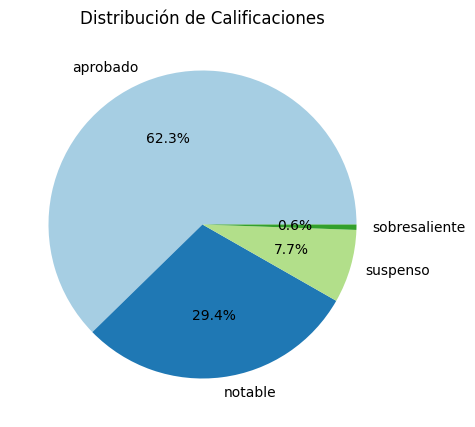

In [19]:
import matplotlib.pyplot as plt
 
# Calcular la frecuencia relativa de cada calificación
frecuencia_relativa = df['calificacion'].value_counts(normalize=True)
 
# Crear el gráfico de tarta
plt.figure(figsize=(5, 5))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
 
# Añadir título
plt.title('Distribución de Calificaciones', fontsize=12)
 
# Mostrar gráfico
plt.show()

**Nota:** cuando la variable cualitativa adquiere más de seis valores distintos, los gráficos de tarta no son una buena opción. En ese caso, las barras son siempre la elección correcta.

### **Variables numéricas**

#### **Variable discreta**

Es «una variable cuantitativa que puede asumir un número contable (o finito) de valores.

- Intuitivamente, una variable discreta puede asumir los valores correspondientes a puntos aislados a lo largo de un intervalo de recta. Es decir, entre dos valores cualesquiera siempre hay un hueco.
- Esto esto último es importante: «…entre dos valores cualesquiera siempre hay un hueco.
- Un ejemplo de variable discreta es el número de hijos que tiene una pareja: 1, 2, 3, 4… No es posible tener 3.254893 hijos.

##### Representación gráfica de variables discretas

Histogramas:  Una variable discreta también se puede representar con gráficos de barras, aunque lo normal es representarlas mediante histogramas, sobre todo si adquieren un elevado número de valores. Los histogramas son similares a los gráficos de barras, con la salvedad de que las barras no están separadas entre sí.

El ancho de cada barra (denominada también como «contenedor») representa el intervalo de valores incluidos en cada contenedor. La altura de cada barra, o contenedor, es proporcional al número de datos incluidos dentro del mismo.

El siguiente gráfico muestra la distribución de las notas de nuestro conjunto de datos:

Bordes de los bins: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


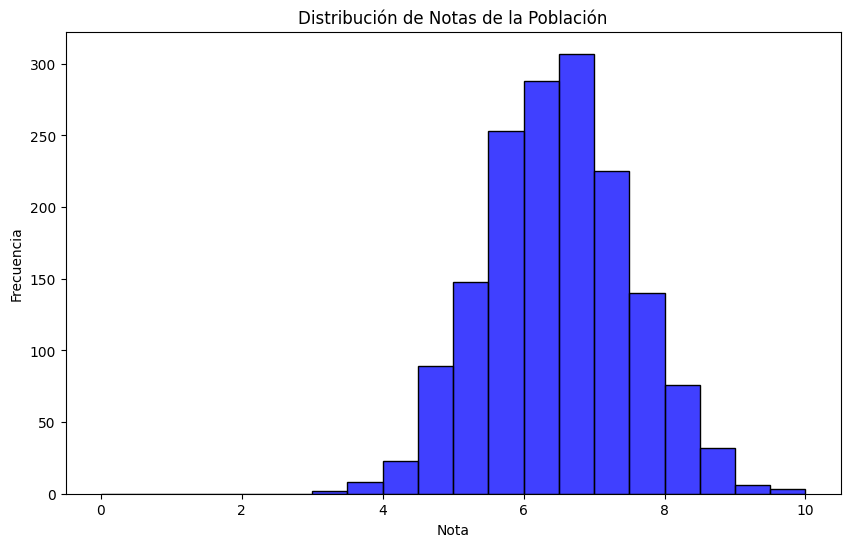

In [20]:
# Definir los bordes de los bins
bins = np.linspace(0, 10, 21)  # 21 porque queremos 20 intervalos
 
# Imprimir los bordes de los bins
print("Bordes de los bins:", bins)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=False, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

También se suele utilizar el Diagrama de Frecuencias Acumuladas. El siguiente código discretiza las notas redondeándolas a enteros, y nuestra el diagrama.


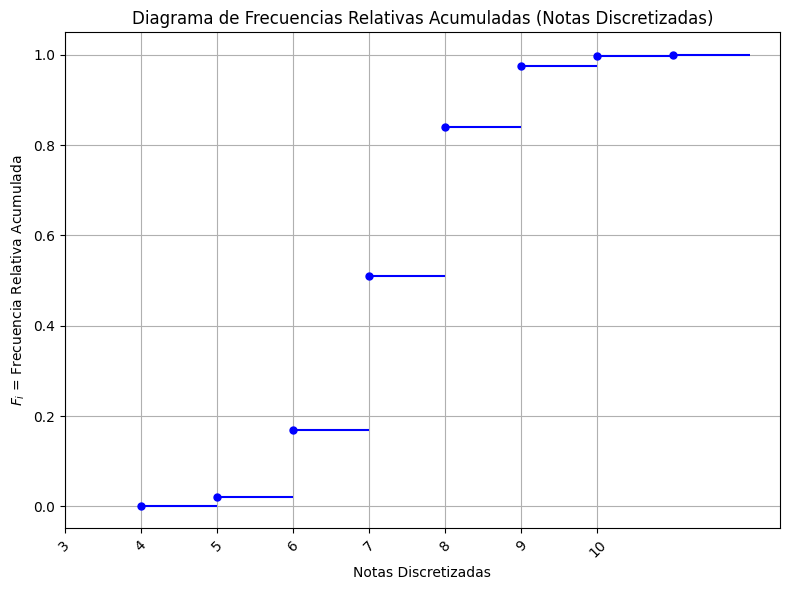

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Redondear las notas hacia el entero más cercano
df['nota_discretizada'] = np.round(df['nota']).astype(int)
 
# Definir los límites de los bins
bins = np.arange(1, 12, 1)  # Limites [1, 2, ..., 11] para incluir el 10 redondeado
 
# Calcular las frecuencias relativas y acumuladas para las notas discretizadas
frecuencia_relativa_notas = df['nota_discretizada'].value_counts(normalize=True).sort_index()
frecuencia_acumulada_notas = frecuencia_relativa_notas.cumsum()
 
# Crear el diagrama de frecuencias acumuladas sin líneas verticales
plt.figure(figsize=(8, 6))
 
# Dibujar las líneas horizontales de frecuencias acumuladas con saltos de alturas distintas
for i in range(1, len(frecuencia_acumulada_notas)):
    plt.hlines(frecuencia_acumulada_notas.iloc[i-1], i, i+1, colors='blue')
 
# Añadir la última línea horizontal
plt.hlines(frecuencia_acumulada_notas.iloc[-1], len(frecuencia_acumulada_notas), len(frecuencia_acumulada_notas) + 1, colors='blue')
 
# Añadir puntos en el extremo izquierdo de cada línea
x_points = np.arange(1, len(frecuencia_acumulada_notas) + 1)
y_points = frecuencia_acumulada_notas.values
plt.scatter(x_points, y_points, color='blue', s=25, marker='o', zorder=5)  # Tamaño de los puntos reducido
 
# Etiquetas en el eje X
plt.xticks(range(len(frecuencia_acumulada_notas)), frecuencia_acumulada_notas.index.astype(str), rotation=45)
 
# Añadir título y etiquetas
plt.title('Diagrama de Frecuencias Relativas Acumuladas (Notas Discretizadas)', fontsize=12)
plt.xlabel('Notas Discretizadas', fontsize=10)
plt.ylabel('$F_i$ = Frecuencia Relativa Acumulada', fontsize=10)
plt.grid(True)
 
# Mostrar gráfico
plt.tight_layout()
plt.show()

Aquí, nos limitaremos a decir que la altura de cada barra indica el porcentaje de notas son inguales o inferiores a un valor concreto. Como los datos son discretos, vemos saltos o escalones. El punto en el extremo izquierdo de cada barra indica que el valor inferior de cada intervalo está incluido en él. El valor superior no, puesto que pertence al intervalo siguiente.

Este gráfico nos dice, por ejemplo, que cerca del 50% de las notas son inferiores iguales o inferiores a 7. La altura en la que se encuentra la barra, por tanto, es proporcional al porcentaje de valores que son iguales o inferiores al valor que marca el punto.

El tamaño de los saltos por su parte, es proporcional a la diferencia de porcentaje entre un valor y otro. Por ejemplo, entre el 7 y el 10, la diferencia es de un 50% (pasamos del 50% al 100% de los datos).

#### **Variable continua**

Es «una variable cuantitativa que puede asumir una cantidad incontable de valores. 
- Intuitivamente, una variable continua puede asumir cualquier valor a lo largo de un intervalo de recta, incluyendo cualquier valor posible entre dos variables determinadas«.
    - Es decir no hay huecos en el intervalo analizado.
- Como ejemplos de variables continuas, podemos poner la estatura y el peso de una persona. Aunque la persona más bajita del mundo mida 62 centímetros, y la más alta mida 251 centímetros, dentro de ese intervalo podemos encontrarnos con cualquier número si empezamos a medir gente. La cantidad de números dentro de ese intervalo es infinita.
- Es común leer, u oir, aquello de que una variable continua es aquella que tiene decimales, pero si los valores que asume la variable son, por ejemplo, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5… y así sucesivamente, la variable es discreta. Aumenta en saltos de 0.5, y entremedio no hay otros valores. Los decimales no garantizan que la variable sea continua.

##### Representación gráfica de las variables continuas

Las variables continuas también se pueden representar mediante histogramas, siempre que las discreticemos antes en contenedores.

Sin embargo, es frecuente utilizar los gráficos de densidad. A continuación mostramos la distribución de estaturas de los alumnos:

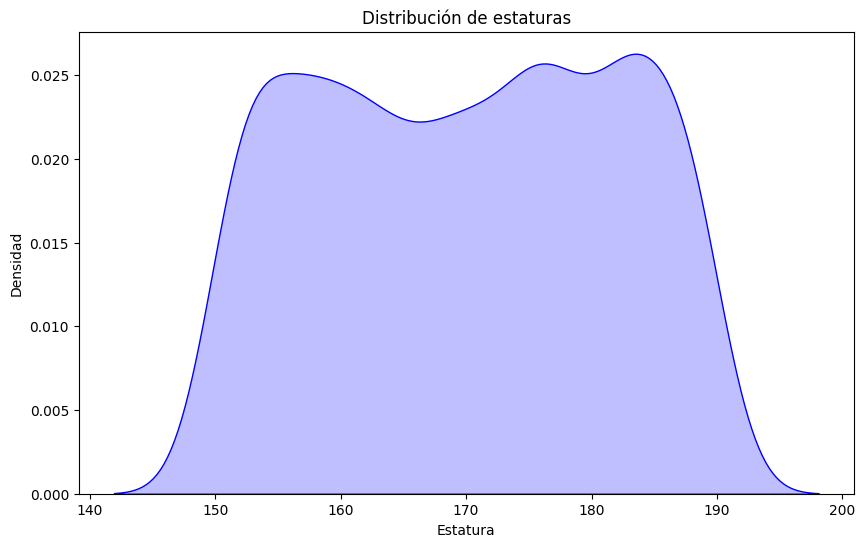

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Graficar la densidad de las estaruras usando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['estatura'], fill=True, color='blue')
plt.title('Distribución de estaturas')
plt.xlabel('Estatura')
plt.ylabel('Densidad')
plt.show()


En general, toda variable numérica puede ser representada con histogramas y mediante gráficos de frecuencia acumulada. 
Existen otras visualizaciones, como los gráficos de **Boxplot** y sus distintas versiones, pero los revisaremos tras haber estudiado antes las medididas de posición.

### Análisis de las variables del dataset de notas

`.info()` nos da la lista de variables y la tipificación de las mismas…

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_estudiante      1600 non-null   object        
 1   asignatura         1600 non-null   object        
 2   tema               1600 non-null   object        
 3   fecha              1600 non-null   datetime64[ns]
 4   nota               1600 non-null   float64       
 5   calificacion       1600 non-null   object        
 6   estatura           1600 non-null   float64       
 7   sexo               1600 non-null   object        
 8   tiempo_estudio     1600 non-null   int64         
 9   grupo              1600 non-null   object        
 10  nota_discretizada  1600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 137.6+ KB


Como podemos ver, en la columna Dtype, Python nos dice que la variable id_estudiante es un «object», que fecha es «datetime64[ns]», que nota es «float», que tiempo de estudio es «int64». etc…

Esto es útil en cierta medida, porque en principio las variables tipo «object» serán cualitativas, y las de tipo «int64» y «float64» serán numéricas. Pero hasta aquí llega la ayuda.

**Para determinar la verdadera naturaleza de las variables, más allá de esto, es necesario estudiar nuestro conjunto de datos en profundidad.**

Podría pasar, por ejemplo, que tuviéramos otra variable, que fuera «aprobado», y que en el dataframe se haya codificado como 1 (uno), en los casos en los que el alumno ha aprobado el examen, y como 0 (cero), si ha suspendido. En ese caso, Python, en su inocencia, nos dirá que la variable es «Int64». 

Pero en realidad es una variable nominal dicotómica.

**Vamos a comprobarlo**: Vamos a añadir a nuestro dataframe con las notas la columna «aprobado», asignando un 1 (uno) si la calificación es distinta de «suspenso», y un 0 (cero), si es igual a «suspenso».

In [25]:
# Añadir la columna "aprobado"
df['aprobado'] = df['calificacion'].apply(lambda x: 0 if x == 'suspenso' else 1)
 
# Mostrar el DataFrame con la nueva columna "aprobado"
print(df.head())

  id_estudiante   asignatura    tema      fecha  nota calificacion  \
0      XAJI0Y6D  Matemáticas  Tema 1 2024-09-01  7.00     aprobado   
1      XAJI0Y6D  Matemáticas  Tema 2 2024-09-29  6.36     aprobado   
2      XAJI0Y6D  Matemáticas  Tema 3 2024-10-27  7.15      notable   
3      XAJI0Y6D  Matemáticas  Tema 4 2024-11-24  8.02      notable   
4      XAJI0Y6D  Matemáticas  Tema 5 2024-12-22  6.27     aprobado   

     estatura sexo  tiempo_estudio grupo  nota_discretizada  aprobado  
0  157.272999    H             357     C                  7         1  
1  157.336180    H             256     C                  6         1  
2  162.169690    H             274     C                  7         1  
3  170.990257    H             185     C                  8         1  
4  167.277801    H             236     C                  6         1  


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_estudiante      1600 non-null   object        
 1   asignatura         1600 non-null   object        
 2   tema               1600 non-null   object        
 3   fecha              1600 non-null   datetime64[ns]
 4   nota               1600 non-null   float64       
 5   calificacion       1600 non-null   object        
 6   estatura           1600 non-null   float64       
 7   sexo               1600 non-null   object        
 8   tiempo_estudio     1600 non-null   int64         
 9   grupo              1600 non-null   object        
 10  nota_discretizada  1600 non-null   int64         
 11  aprobado           1600 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 150.1+ KB


- Antes de continuar, debemos explicar una cosa: en este caso, en el que hemos creado un dataframe de ejemplo, conocemos la naturaleza de cada variable de antemano, y el tipo de valores que contienen.
- En la vida real, esto no es así. Lo normal es que nos encontremos con conjunto de datos, de miles o millones de líneas y quizá cientos de variables, de las que NO SABEMOS NADA, más allá de una descripción somera.


**Ejercicio: revisemos variable por variable.**
- Para cada variable, obtén una muestra y determina el tipo de variable que debería ser, según la clasificación anterior.
- Determina su utilidad
- Grafícala usando el tipo de gráfico recomendado

**Solución**

**id_estudiante**


In [28]:
# Muestra de 5 valores al azar de la variable id_estudiante
random_sample = df['id_estudiante'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

553     Y9V86WZS
890     7SRCBPLJ
1207    YV37DIA5
1341    VDZ4X1ZH
57      ZBIKCIDK
Name: id_estudiante, dtype: object


Se trata de valores alfanuméricos, que identifican a cada estudiante.

- Es una variable cualitativa o categórica nominal. Se puede considerar como el nombre del estudiante (en realidad, sustituye al nombre). 
- Tanto el ID, como el nombre de un estudiante, no suelen tener relación con las otras variables, por lo que más adelante veremos no se contemplan en el análisis de los datos.
- Tiene utilidad para cruzar los datos con otra tabla que tenga los nombres de los estudiantes, pero no para sacar conclusiones a partir de ella.

**asignatura**

In [29]:
# Muestra de 5 valores al azar de la variable asignatura
random_sample = df['asignatura'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

1520    Matemáticas
153     Matemáticas
1172    Matemáticas
1589    Matemáticas
1389    Matemáticas
Name: asignatura, dtype: object


Solo toma un valor: ‘Matemáticas’. Sabemos que es así por como hemos definido el dataframe, pero como hemos dicho antes, los normal es que estos datos no los sepamos de antemano, y debamos comprobarlos.

Podemos pensar que nuestro dataframe es una versión filtrada de otro conjunto de datos más grande que tiene las notas de todas las asignaturas. Pero debemos comprobarlo:

In [30]:
# Calcular el número de valores únicos en la columna "asignatura"
num_asignaturas_unicas = df['asignatura'].nunique()
 
# Mostrar el resultado
print(f"El número de asignaturas únicas es: {num_asignaturas_unicas}")

El número de asignaturas únicas es: 1


Efectivamente, la variable solo toma un valor.

**Esto la hace inútil en términos de análisis (no hay variabilidad en ella, pero ya llegaremos ahí).**

Ahora nos limitaremos a clasificarla como variable estadística, diciendo que es, al igual que el ID, una variable cualitativa o categórica nominal.

**tema**

In [31]:
# Muestra de 5 valores al azar de la variable tema
random_sample = df['tema'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

963     Tema 4
836     Tema 7
1474    Tema 5
1481    Tema 2
1312    Tema 3
Name: tema, dtype: object


Toma los valores «Tema n», siendo «n» el número del tema.

Recordemos que estamos simulando que no sabemos mucho del dataframe, así que intentaremos ver más detalles: todos los valores, ordenados alfabéticamente:

In [33]:
# Obtener valores únicos de la columna "tema" y ordenarlos alfabéticamente
temas_unicos = sorted(df['tema'].unique())
 
# Mostrar el resultado
print("Listado de temas por orden alfabético:")
for tema in temas_unicos:
    print(tema)

Listado de temas por orden alfabético:
Tema 1
Tema 10
Tema 2
Tema 3
Tema 4
Tema 5
Tema 6
Tema 7
Tema 8
Tema 9


Quitando el problema de que 10 está antes que el 2 (ahora no vamos a detenernos aquí), vemos que «n» va de 1 a 10.

Tema es, por tanto, una variable cualitativa o categórica ordinal, puesto que el Tema 1 va antes que el Tema 2, y así hasta 10.

**fecha**

In [34]:
# Muestra de 5 valores al azar de la variable fecha
random_sample = df['fecha'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

470    2024-09-01
409    2025-05-11
1231   2024-09-29
1561   2024-09-29
47     2025-03-16
Name: fecha, dtype: datetime64[ns]


La fecha es una variable tipo DateTime para Python. Estas variables son muy traicioneras. Para empezar, hay que estar seguro del formato.

En este caso, una revisión aleatoria son sirve para para ver que el formato es aaaa-mm-dd. Ya entraremos en detalles sobre este tipo de variable. Por ahora mi recomendación es, si se quiere saber más, consultar la documentación oficial de numpy (si se está trabajando en Python).

Desde un punto de vista estadístico, la fecha es una variable cualitativa o categórica ordinal (al igual que «tema»).

nota

In [36]:
# Muestra de 5 valores al azar de la variable nota
random_sample = df['nota'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

54      6.76
787     6.42
316     6.70
860     7.39
1493    6.81
Name: nota, dtype: float64


Aquí tenemos un caso interesante. «Nota» es una variable numérica, y Python la ha tipificado como tal (float64). Si es float, es porque tiene decimales.

Como comentamos antes, se observa una clara tendencia a clasificar cualquier variable numérica con decimales como continua, aunque en realidad no lo sea. Vamos a explicar las razones de esto.

Conceptualmente, las notas SON continuas (como la estatura, el peso, el índice de masa corporal, la distancia, etc…).

Sin embargo, y si nos fijamos, las notas de nuestro dataframe están redondeadas a 2 decimales. Esto se hace porque, en la práctica, trabajar con más de 2 decimales en este caso es un poco exagerado.

Por lo tanto, tenemos huecos. Entre un 7.44 y un 7.45 no hay nada. No vamos a encontrar, por ejemplo, un 7.443, o un 7.4432.

Recordemos aquí la definición de una variable continua: «una variable continua puede asumir cualquier valor a lo largo de un intervalo de recta, incluyendo cualquier valor posible entre dos variables determinadas» (Johnson & Kuby).

Nuestra variable «nota» no cumple esa condición. Esto significa que la variable se ha «discretizado», y «nota», en este caso, es una variable cuantitativa o númérica discreta. Puede tomar muchos valores, es cierto, pero son finitos.

**Aunque efectivamente «nota» es una variable numérica discreta en este caso, en muchos aspectos se suele tratar como si fuera continua.**

- Por ejemplo, cuando hemos graficado la distribución de notas, lo hemos hecho con un gráfico de densidad, que no tiene escalones, como si etre el 7.44 y 7.45 hubiera valores. Con las variables discretas, las distribuciones se grafican con histogramas:

Bordes de los bins: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


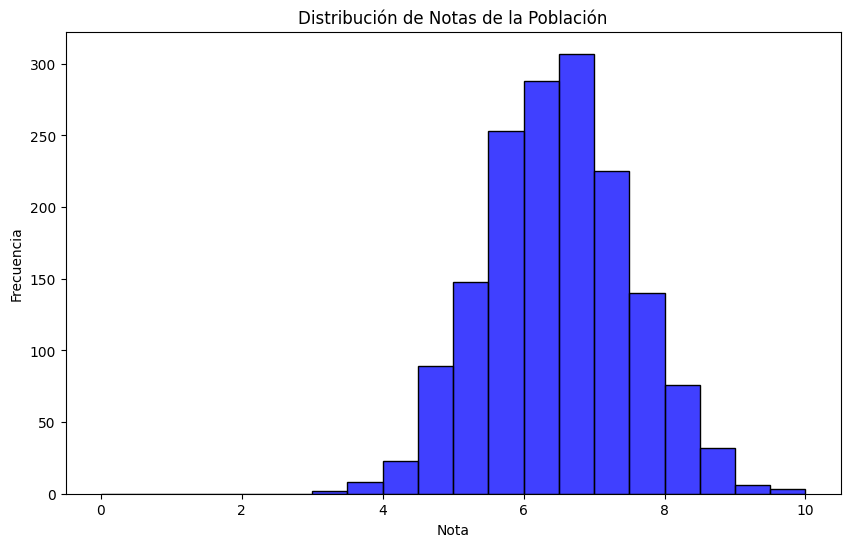

In [37]:
# Definir los bordes de los bins
bins = np.linspace(0, 10, 21)  # 21 porque queremos 20 intervalos
 
# Imprimir los bordes de los bins
print("Bordes de los bins:", bins)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=False, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

En el histograma superior se han creado 20 contenedores (bins), en los que se han agrupado varias notas en cada contenedor. En cada uno, están las notas en saltos de 0.50, por lo que el primer contenedor va de [1.50 a 2.00), el segundo de [2.00 a 2.49), etc… Es decir, en el segundo contenedor, por ejemplo, tendremos notas como 2.01, 2.23, 2.45, etc… Los corchetes cuadrados indican que el valor está en el intervalo, y el redondo que no.

Si aumentamos el número de contenedores (por ejemplo en saltos pequeñitos de 0.1), los contendores son más estrechos.

En este caso, si la nota mínima es 1.5, el primer contendor contendrá las notas del intervalo [1.50, 1.60), pasando por 1.51, 1.52, 1.53… hasta 1.59.

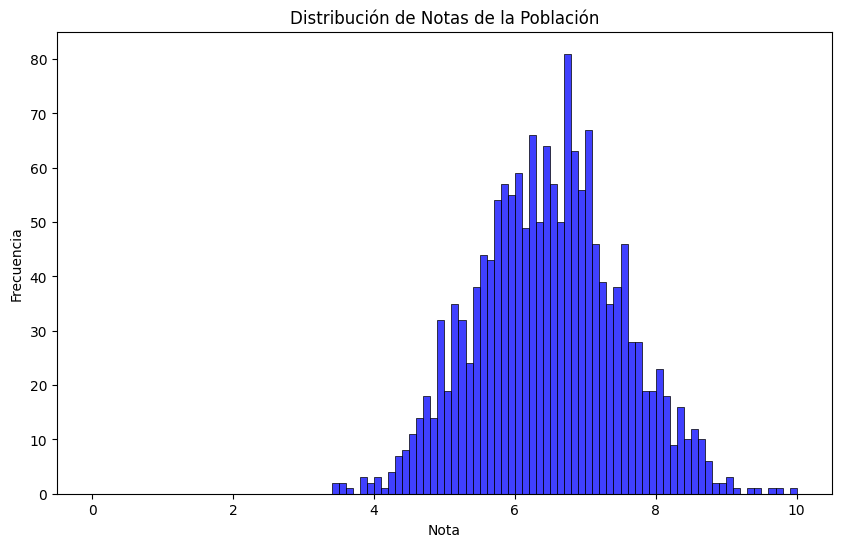

In [38]:
# Definir los bordes de los bins del tamaño de 0.1
bins = np.arange(0, 10.1, 0.1)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=False, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Si aumentamos más aún el número de contenedores, por ejemplos, en saltos de 0.01, tenemos un histograma que nos muestra todas las notas, desde el 0.00 al 10.00, pasando por 0.01, 4.52, 7.44, 8.78, 9.45… por poner sólo algunos ejemplos.

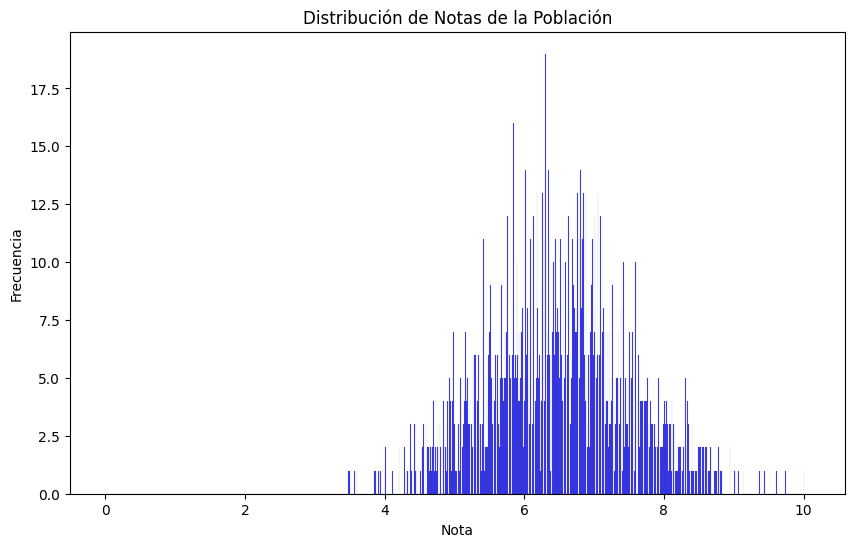

In [39]:
# Definir los bordes de los bins del tamaño de 0.01
bins = np.arange(0, 10.1, 0.01)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=False, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Elegir el número correcto de contenedores en un histograma, con el fin de visualizar adecuadamente la verdadera naturaleza de una distribución, es un arte. Sobre todo si la variable, aunque discreta, tiene decimales.

Con un gráfico de densidad, en lugar de un histograma de frecuencias, no hace falta preocuparse tanto por eso.

Fijarse lo que pasa si, sobre los histogramas anteriores, pintamos la curva de densidad. A vuestro juicio, ¿qué histograma se parece más a dicha curva?

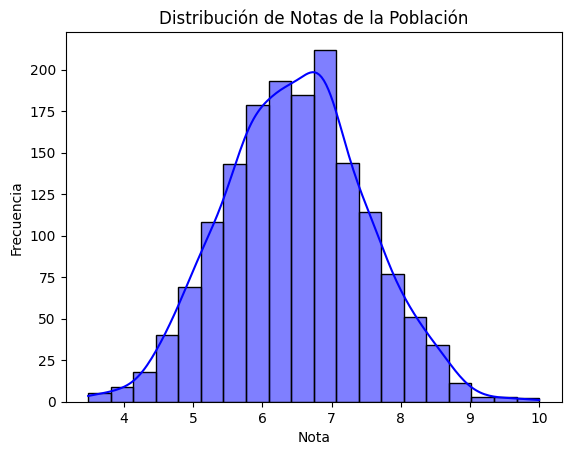

In [40]:
sns.histplot(data=df['nota'], bins=20, kde=True, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

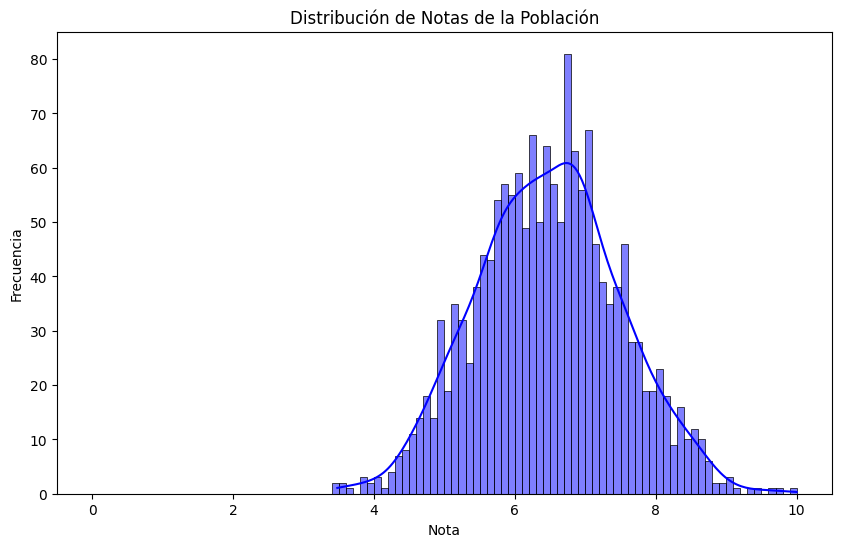

In [41]:
# Definir los bordes de los bins del tamaño de 0.1
bins = np.arange(0, 10.1, 0.1)
 
# Graficar el histograma de las notas usando Seaborn con la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=True, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

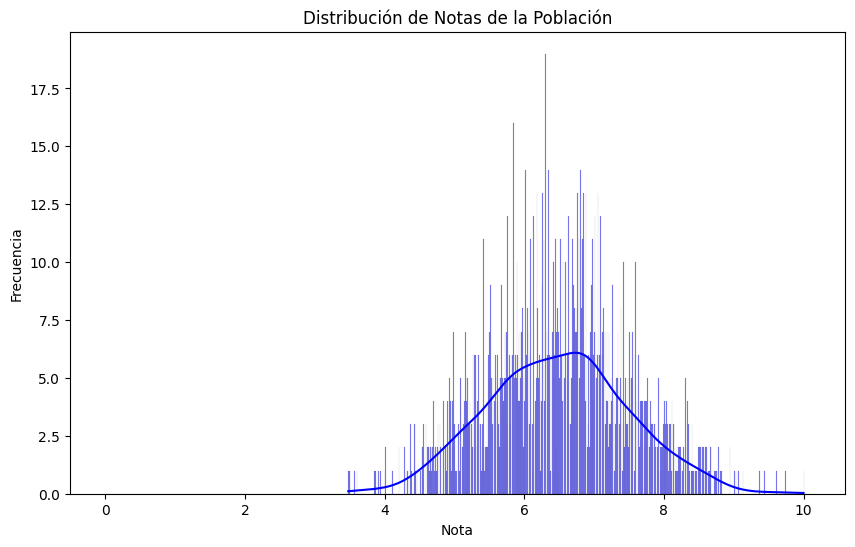

In [42]:
# Definir los bordes de los bins del tamaño de 0.1
bins = np.arange(0, 10.1, 0.01)
 
# Graficar el histograma de las notas usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df['nota'], bins=bins, kde=True, color='blue')
plt.title('Distribución de Notas de la Población')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Aunque es importante saber que un gráfico de densidad no es lo mismo que un histograma de frecuencias (de nuevo nos hemos estado adelantando un poco), ambos nos están mostrando la «forma» de la distribución.

**Es por eso que, cuando hay decimales, a nivel de tratamiento gráfico se suele optar por tratar la variable como continua, aunque sea discreta.**

**calificacion**

La calificación en este dataframe, es una representación con palabras de las notas obtenidas.

In [43]:
# Obtener valores únicos de la columna "calificacion" y ordenarlos alfabéticamente
calificacion_unicos = sorted(df['calificacion'].unique())
 
# Mostrar el resultado
print("Listado de calificaciones por orden alfabético:")
for calificacion in calificacion_unicos:
    print(calificacion)

Listado de calificaciones por orden alfabético:
aprobado
notable
sobresaliente
suspenso


**estatura**

In [44]:
# Muestra de 5 valores al azar de la variable estatura
random_sample = df['estatura'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

1522    165.380633
729     178.283459
960     151.559173
1229    187.582744
587     169.912500
Name: estatura, dtype: float64


En este caso, hablar de variable numérica continua tiene todo el sentido del mundo. 

Aún cuando la discretizáramos quitando todos los decimales, y quedándonos con la parte entera redondeada al decimal más cercano, tratarla como continua sería lo más lógico.

En ese caso, todo lo dicho para la variable «nota» aplicaría aquí.

**sexo**

In [45]:
# Muestra de 5 valores al azar de la variable sexo
random_sample = df['sexo'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

186     H
1458    M
1304    M
1453    M
318     H
Name: sexo, dtype: object


Sexo es una variable categórica nominal. 

Según qué casos, puede ser dicotómica o no. 
- Si toma sólo dos valores, es dicotómica. Si toma más de dos, no lo es.

Saber este tipo de cosas es importante, porque en fases posteriores esto nos permitirá decidir como tratar la variable si necesitamos convertirla en numérica, para su tratamiento y modelización.
- Una variable dicotómica se puede transformar en ceros y unos sin alterar el número de columnas del dataframe. 
- Si no es dicotómica, se deben usar otras alternativas para transformarla en numérica.

**tiempo_estudio**

In [46]:
# Muestra de 5 valores al azar de la variable tiempo_estudio
random_sample = df['tiempo_estudio'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

447     369
1462    242
1477    350
1549    312
1329    286
Name: tiempo_estudio, dtype: int64


Hummm. Esto es interesante. Si no hubiésemos generado nostros el dataframe con datos de ejemplo, especificando que los valores de tiempo de estudio estuvieran en minutos, con sólo ver estos datos no podríamos estar seguros.

¿Qué estamos viendo? ¿Horas, minutos, segundos, flerps?

Muchas veces nos encontraremos este tipo de problemas, y lo mejor es acudir a la fuente, y asegurarse de la unidad de medida.

En cualquier caso, es una variable numérica. 

- ¿Sabrías decir si es discreta o continua? 
- Y si es discreta ¿tiene sentido tratarla como continua?

**grupo**

In [47]:
# Muestra de 5 valores al azar de la variable grupo
random_sample = df['grupo'].sample(5)
 
# Mostrar los valores seleccionados al azar
print(random_sample)

637    A
574    A
570    A
549    A
787    B
Name: grupo, dtype: object


En el caso de los grupos, tenemos cuatro valores posibles: A, B, C, D. 

Estos valores se pueden ordenar alfabéticamente, y la A está antes que la B, la B antes que la C, y la C antes de la D.

*Aún sabiendo esto, ¿podríamos decir que la variable «grupo» es ordinal?*
Las calificaciones lo son, sin duda. Los años también. Las posiciones de una carrera (primero, segundo, tercero…).

- Si volvemos al ejemplo de las calificaciones, podríamos cambiar Sobresaliente por A, Excelente por B, Muy bien por C, Bien por D, y Suspenso por E. En ese caso, el orden alfabético conincide con el orden intrínseco de la variable.
- Pero podríamos haber nombrado los grupos por colores: A es Azul, B es Blanco, C es Caoba y D es Dorado.
- Si los ordenamos alfabéticamente, Azul iría antes que Blanco, Blanco antes que Caoba. Y así hasta el Dorado.
- ¿Tiene sentido decir que Azul va primero que Blanco. ¿O que Dorado va después de Caoba?
- En este caso, los grupos son nombres de un conjunto de alumnos, y no tienen orden intrínseco. «Grupo», por tanto, sería una variable cualitativa o categórica nominal.

**aprobado**

una variable que Pythontipifica como numéricas cuando son, en esencia, nominales dicotómicas.

**Bibliografía y referencias**
- Johnson, R. & Kuby, P. (2008). Estadistica elemental: lo esencial (10a ed.). Cengage Learning Editores S.A.
- Freedman, D., Pisani, R., & Purves, R. (2007). Statistics (4a ed.). WW Norton.